# MNIST 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline  
print ("packs loaded")

packs loaded


# Download and Extract MNIST dataset

In [2]:
print ("Download and Extract MNIST dataset")
mnist = input_data.read_data_sets('data/', one_hot=True)
print
print (" tpye of 'mnist' is %s" % (type(mnist)))
print (" number of trian data is %d" % (mnist.train.num_examples))
print (" number of test data is %d" % (mnist.test.num_examples))

Download and Extract MNIST dataset
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
 tpye of 'mnist' is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
 number of trian data is 55000
 number of test data is 10000


In [3]:
# What does the data of MNIST look like? 
print ("What does the data of MNIST look like?")
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print
print (" type of 'trainimg' is %s"    % (type(trainimg)))
print (" type of 'trainlabel' is %s"  % (type(trainlabel)))
print (" type of 'testimg' is %s"     % (type(testimg)))
print (" type of 'testlabel' is %s"   % (type(testlabel)))
print (" shape of 'trainimg' is %s"   % (trainimg.shape,))
print (" shape of 'trainlabel' is %s" % (trainlabel.shape,))
print (" shape of 'testimg' is %s"    % (testimg.shape,))
print (" shape of 'testlabel' is %s"  % (testlabel.shape,))

What does the data of MNIST look like?
 type of 'trainimg' is <class 'numpy.ndarray'>
 type of 'trainlabel' is <class 'numpy.ndarray'>
 type of 'testimg' is <class 'numpy.ndarray'>
 type of 'testlabel' is <class 'numpy.ndarray'>
 shape of 'trainimg' is (55000, 784)
 shape of 'trainlabel' is (55000, 10)
 shape of 'testimg' is (10000, 784)
 shape of 'testlabel' is (10000, 10)


In [4]:
# TechtreeAI : 실제 이미지 크기로 보여준다.
def display_image_in_actual_size(im_data):

    dpi = 80
    #im_data = plt.imread(im_path)
    height, width, depth = 28, 28, 1    # im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap=plt.get_cmap('gray'))    #, cmap='gray')

    plt.show()


How does the training data look like?
54021th Training Data Label is 9


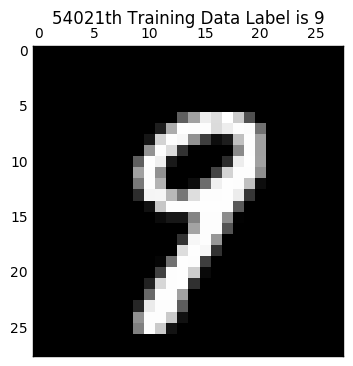

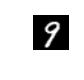

1860th Training Data Label is 2


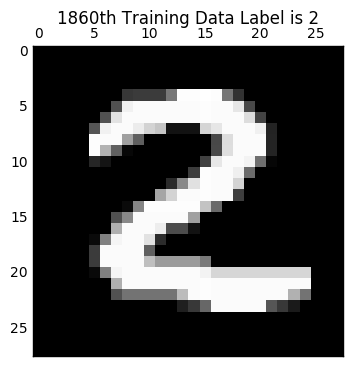

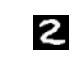

36199th Training Data Label is 9


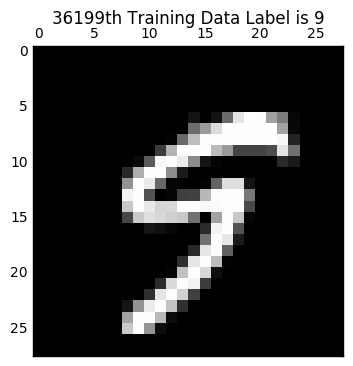

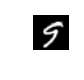

40847th Training Data Label is 4


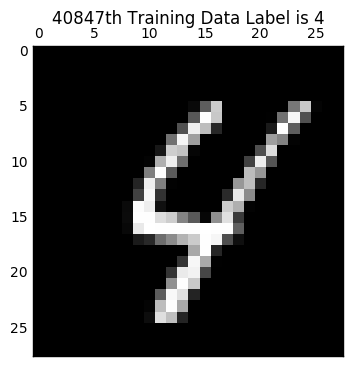

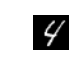

9621th Training Data Label is 4


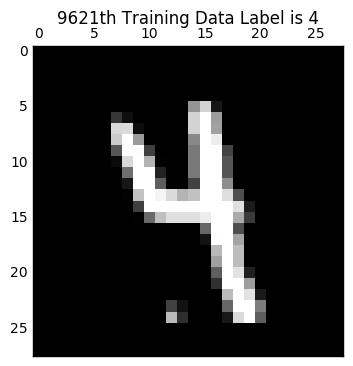

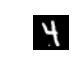

In [5]:
# How does the training data look like?
print ("How does the training data look like?")
nsample = 5
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(curr_label))
    print ("" + str(i) + "th Training Data " 
           + "Label is " + str(curr_label))
    
    display_image_in_actual_size(curr_img)

In [6]:
# Batch Learning? 
print ("Batch Learning? ")
batch_size = 100
batch_xs, batch_ys = mnist.train.next_batch(batch_size)
print ("type of 'batch_xs' is %s" % (type(batch_xs)))
print ("type of 'batch_ys' is %s" % (type(batch_ys)))
print ("shape of 'batch_xs' is %s" % (batch_xs.shape,))
print ("shape of 'batch_ys' is %s" % (batch_ys.shape,))

Batch Learning? 
type of 'batch_xs' is <class 'numpy.ndarray'>
type of 'batch_ys' is <class 'numpy.ndarray'>
shape of 'batch_xs' is (100, 784)
shape of 'batch_ys' is (100, 10)


In [7]:
# Get Random Batch with 'np.random.randint'
print ("5. Get Random Batch with 'np.random.randint'")
randidx   = np.random.randint(trainimg.shape[0], size=batch_size)
batch_xs2 = trainimg[randidx, :]
batch_ys2 = trainlabel[randidx, :]
print ("type of 'batch_xs2' is %s" % (type(batch_xs2)))
print ("type of 'batch_ys2' is %s" % (type(batch_ys2)))
print ("shape of 'batch_xs2' is %s" % (batch_xs2.shape,))
print ("shape of 'batch_ys2' is %s" % (batch_ys2.shape,))

5. Get Random Batch with 'np.random.randint'
type of 'batch_xs2' is <class 'numpy.ndarray'>
type of 'batch_ys2' is <class 'numpy.ndarray'>
shape of 'batch_xs2' is (100, 784)
shape of 'batch_ys2' is (100, 10)


In [8]:
randidx

array([ 6769, 32241, 54391, 48453, 20596, 15535, 25910, 16534, 11623,
        8888,  2175, 12996, 21194, 36625, 51023, 50147, 14709, 16149,
       48128, 14074, 20950, 51421, 21105, 43308, 12533, 47715, 21782,
       54822, 10685, 42066, 27701,  9272, 40273, 26563, 32208, 27078,
       31821, 16095, 50043, 41648, 51915, 32023, 46911, 12446,  5511,
       43504, 52485, 29670, 34661, 45529, 27350, 13529, 12255, 29673,
       36364, 42964, 14907, 36398, 46677, 36547,  3695, 10951, 29879,
        6001,  8035, 34410, 33264, 36503, 27639, 14840, 32159, 43631,
        7894, 30224, 15994, 35250, 31995, 28721, 32786, 37718, 18016,
        3152,  1212, 51528, 50550, 14711, 39630, 54106, 42980, 39163,
       12826, 40885,  2568,  6981, 29651, 31996, 25722, 49229, 39614, 49930])